Nama : Muhammad Rayyan Aqiilah Manna

NIM : 1103210210

Tugas : Tugas Week 6 K Means Clustering On Mall_Customers.csv dataset

Dataset : Mall_Customers.csv

Dokumentasi ChatGPT : https://chat.openai.com/share/6d12f80f-cbe1-4d95-a88f-e1bfb23d70e7

#Mount Drive to Google Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Exploratory Data Analysis

Prompt ChatGPT : berkan saya kode untuk set daataset menjadi sebiah dataframe

In [2]:
import pandas as pd

# Lokasi file dataset di Google Drive
file_path = "/content/drive/MyDrive/Dataset/Mall_Customers.csv"  # Ganti dengan path sesuai dengan lokasi file Anda di Google Drive

# Membaca file CSV dan membuat dataframe
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari dataframe
print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


#Data Preprocessing

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Menghapus kolom customerID

Prompt ChatGPT : berikan kode untuk menghapus kolom data CustomerID pada dataset mall customers

In [4]:
# Menghapus kolom 'CustomerID'
df.drop('CustomerID', axis=1, inplace=True)

# Menampilkan beberapa baris pertama dari dataframe setelah menghapus kolom
print(df.head())

    Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


Melakukan rename fitur Genre
Prompt ChatGPT : berikan kode untuk rename kolom Genre menjadi Gender

In [5]:
# Mengganti nama kolom 'Genre' menjadi 'Gender'
df.rename(columns={'Genre': 'Gender'}, inplace=True)

# Menampilkan beberapa baris pertama dari dataframe setelah mengubah nama kolom
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40


Konversi kategorikal menjadi numerik

Prompt ChatGPT : berikan saya kode untuk melakukan konversi kategorikal menjadi numerik pada male dan female

In [6]:
# Mengganti nilai kategorikal 'Male' dan 'Female' menjadi numerik
gender_mapping = {'Male': 0, 'Female': 1}
df['Gender'] = df['Gender'].map(gender_mapping)

# Menampilkan beberapa baris pertama dari dataframe setelah mengubah nilai kategorikal menjadi numerik
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40


Mencari tahu berapa jumlah cluster terbaik

Prompt ChatGPT : beri kode untuk memilih jumlah cluster terbaik menggunakan elbow method

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

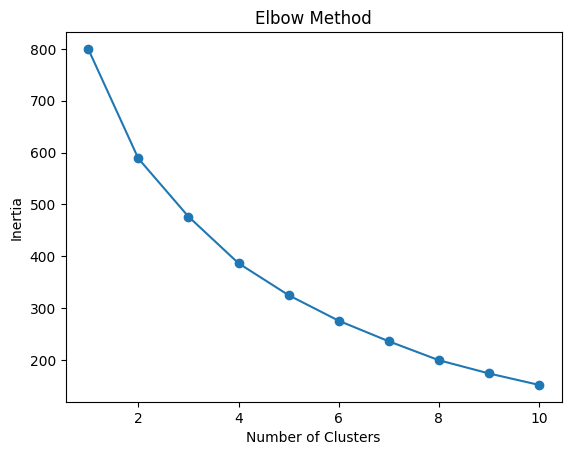

In [12]:
"import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Menjalankan KMeans untuk jumlah cluster dari 1 hingga 10
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

# Plotting elbow method
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

#Modeling

Melakukan Standarisasi

Prompt ChatGPT : berikan saya kode untuk melakukan standarisasi

In [9]:
from sklearn.preprocessing import StandardScaler

# Memilih kolom numerik untuk standarisasi
numerical_cols = ['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']

# Membuat objek StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi pada kolom numerik
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Menampilkan beberapa baris pertama dari dataframe setelah standarisasi
print(df.head())

     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0 -1.128152 -1.424569           -1.738999               -0.434801
1 -1.128152 -1.281035           -1.738999                1.195704
2  0.886405 -1.352802           -1.700830               -1.715913
3  0.886405 -1.137502           -1.700830                1.040418
4  0.886405 -0.563369           -1.662660               -0.395980


Melakukan clustering

Prompt ChatGPT : beri kode untuk membuat cluster sebanyak  5 cluster

In [13]:
# Membuat objek KMeans dengan jumlah cluster 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Melakukan clustering
kmeans.fit(df)

# Menambahkan kolom 'Cluster' ke dataframe dengan label cluster untuk setiap data
df['Cluster'] = kmeans.labels_

# Menampilkan beberapa baris pertama dari dataframe dengan kolom Cluster
print(df.head())

     Gender       Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0 -1.128152 -1.424569           -1.738999               -0.434801        1
1 -1.128152 -1.281035           -1.738999                1.195704        1
2  0.886405 -1.352802           -1.700830               -1.715913        2
3  0.886405 -1.137502           -1.700830                1.040418        0
4  0.886405 -0.563369           -1.662660               -0.395980        2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Visualisasi hasil clustering

Prompt ChatGPT : lalu berikan kode untuk melakukan visualisasi hasil cluster dengan sumbu x adalah Annual Income (k$) dan sumbu y adalah Spending Score (1-100)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


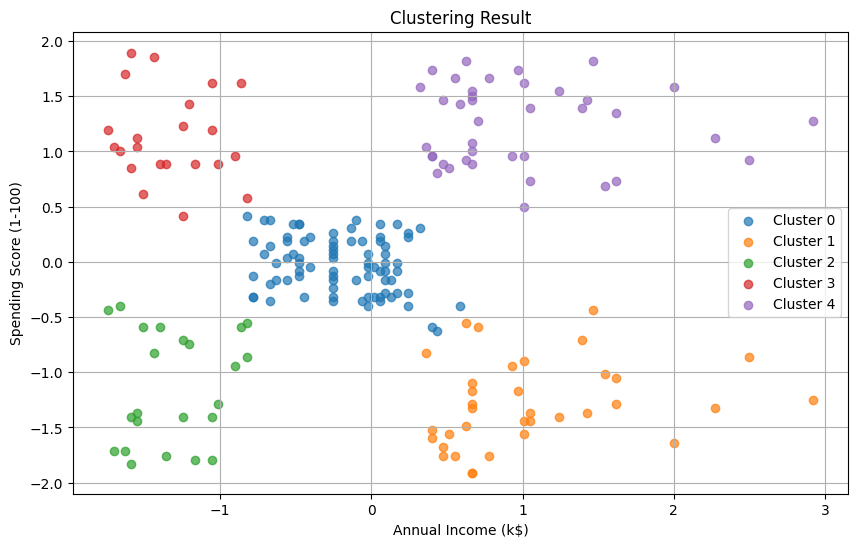

In [14]:
# Memilih kolom yang akan digunakan untuk clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Membuat objek KMeans dengan jumlah cluster 5
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)

# Melakukan clustering
kmeans.fit(X)

# Menambahkan kolom 'Cluster' ke dataframe dengan label cluster untuk setiap data
df['Cluster'] = kmeans.labels_

# Visualisasi hasil cluster
plt.figure(figsize=(10, 6))

# Membuat scatter plot untuk setiap cluster
for cluster in range(5):
    plt.scatter(df[df['Cluster'] == cluster]['Annual Income (k$)'],
                df[df['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}',
                alpha=0.7)

# Menambahkan label sumbu x dan sumbu y serta judul
plt.title('Clustering Result')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()

#Evaluasi

prompt ChatGPT : berikan kode untuk melakukan evaluasi hasil clustering

In [16]:
from sklearn.metrics import silhouette_score

# Hitung inertia
inertia = kmeans.inertia_

# Hitung silhouette score
silhouette_avg = silhouette_score(X, kmeans.labels_)

# Menampilkan hasil evaluasi
print(f"Inertia: {inertia}")
print(f"Silhouette Score: {silhouette_avg}")

Inertia: 65.56840815571681
Silhouette Score: 0.5546571631111091
